### Problem Statement

### Perform Analysis Using Logistic regression, LDA, QDA, KNN. and Comparison Between them.


**Logistic regression**
- Logistic Regression is a machine learning classcification algorithm that is used to predict the probability of a categorical 
dependent variable.
- In logistic regression, the dependent variable is binary variable that contains data coded as 1(yes,success)
or 0(no,failure)
- Logistic regression analysis is used to examine the association of (categorical or continuous) independent variable with
one dichotomous dependent variable.
- Odds ratio represents the constant effect of a pedictor X, on the likelihood that one outcome will occure. Odds ratios are 
used to compare the relative odds of the occurence of the outcome of interest

In [ ]:
**Importing the libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
weekly=pd.read_csv("weekly_data.csv")
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


- Year : The year that the observation was recorded.
    
- Lag1 : Percentage return for previous week.

- Lag2 : Percentage return for 2 weeks previous.

- Lag3 : Percentage return for 3 weeks previous.

- Lag4 : Percentage return for 4 weeks previous.

- Lag5 : Percentage return for 5 weeks previous.

- Volume : Volume of Shares traded(average number of daily shares traded in billions.)

- Today :A factor with levels Down and Up indicating weather the market had positive or negative return on a given week.
**In our dataset 1089 rows and 9 columns.**

**a) : Produce Some numerical and graphical Summaries of the weekly data.**

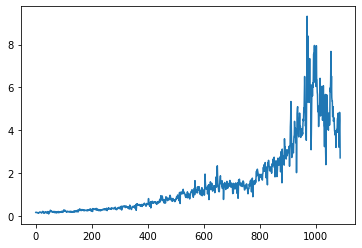

In [3]:
weekly['Volume'].plot()
plt.show()

In [4]:
weekly.describe()   # It gives the Summary of the weekly data.

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [5]:
weekly.corr(method='pearson')

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


**The correlation between the lag variable and today's return are close to zero. and also the correlation between the lag 
variable and voulume is close to zero**

**The only substantial correlation between year and volume. by plotting the data we see that volume is increasing over time.**

**The average number of shares traded daily increased from 1990 to 2010**

The Autocorrelation plot for the data


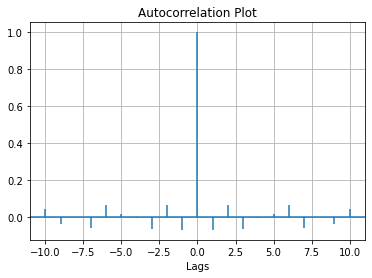

In [7]:
data=weekly['Lag2']
plt.title('Autocorrelation Plot')
plt.xlabel('Lags')
plt.acorr(data,maxlags=10)
print('The Autocorrelation plot for the data')
plt.grid(True)
plt.show()

**Autocorrelation graph is used to check the randomness in the dataset. It is the graph of Lag2 variable.
Here we see that no randomness in the Lag2 variable.**

**Scatterplot of Logistic Regression**

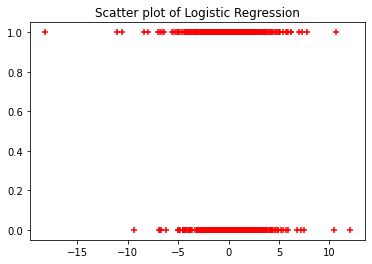

In [92]:
x_1=weekly['Lag1']
plt.scatter(x_1,y, marker='+',color='red')
plt.title('Scatter plot of Logistic Regression')
plt.show()

**This is the Scatterplot between Direction and Lag1 there is sick regression data so we can't actually fit linear regression
line so here use logistic regression**


**Converting Direction Variable into numeric**

In [36]:
def categorizing(dat):
    cat=dat.astype('category').cat.codes
    return cat
weekly['Direction']=categorizing(weekly['Direction'])    # We converted Down in 0 and Up in 1

**b) Use the full data set to perform logistic regression with direction as the response and five lag variables plus volume
as predictors. Use the summary function to print the results.**

In [37]:
x=weekly.drop(['Year','Direction','Today'],axis=1).values
y=weekly['Direction']

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)


In [39]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)
y_pred=logmodel.predict(x_test)
#print(y_pred)

In [ ]:
from sklearn.metrics import accuracy_score
Accuracy_score=accuracy_score(y_test,y_pred)
print(Accuracy_score)

**For printing summary of Logistic Regression**

In [40]:
import statsmodels.api as sm
x_train_logit=sm.add_constant(x_train)
log_reg=sm.Logit(y_train,x_train_logit).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.684309
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  816
Model:                          Logit   Df Residuals:                      809
Method:                           MLE   Df Model:                            6
Date:                Sat, 09 Apr 2022   Pseudo R-squ.:                0.003993
Time:                        08:53:11   Log-Likelihood:                -558.40
converged:                       True   LL-Null:                       -560.63
Covariance Type:            nonrobust   LLR p-value:                    0.6124
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2224      0.100      2.234      0.025       0.027       0.418
x1            -0.0341      0.

**Here we plot summary of Logistic regression** 

**Log-Likelihood - The natural logarithm of the MLE. MLE is the optimization process of finding the set of parameters.**

**LL-Null - The value of log-likelihood of the model when no independent variable is included.**

**Pseudo R-sq- It is the ratio of log likelihood of the null model to that of the full model.**

**Que-Do any of the predictors appear to be statistically significant ?**

 **Ans-There is none of the Predictor which is statistically significant** 

**Compute Confusion-Matrix and overall fraction of correct predictors**


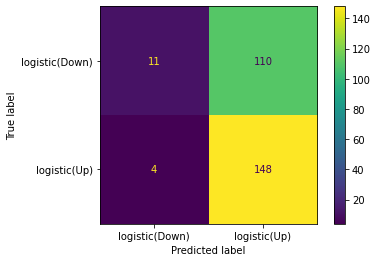

In [69]:
from sklearn.metrics import confusion_matrix
c_m=confusion_matrix(y_test,y_pred)
c_m
plot_confusion_matrix(logmodel,x_test,y_test,
                     
                     display_labels=["logistic(Down)","logistic(Up)"])

**The diagonal element of the confusion matrix indicate correct predictions, while the off-diagonal reprsent incorrect predictor
Hence our model is correctly predicted that market would go up on 148 days and that it go down on 11 days , for total 
11+148=159,correct predictions and 114 are incorrect prediction**

**Odds Ratio **

**Odds Ratio interepretation- from the above summary we got the coeffiecients but using this it is difficult to interpret the 
odd ratio, but log odds is not intuitive in its interepretation.Lets convert this odds ratio and interepret the model again**

In [70]:
model_odds=pd.DataFrame(np.exp(log_reg.params),columns=['Odds Ratio'])
model_odds['z-values']=log_reg.pvalues
model_odds

,Odds Ratio,z-values
const,1.249121,0.025486
x1,0.966504,0.272595
x2,1.033865,0.276213
x3,0.981477,0.539316
x4,0.981530,0.536452
x5,0.972181,0.345351
x6,1.006745,0.876443


**The Odds ratio is less than 1 means the coefficients of $\beta's $ is Negative.**

**Odds ratio of Lag1 is 0.966504 $<$1 then the negative association between the ${x_1}$ and ${y}$.
The Odds Ratio corresponding to ${x_2}$=1.033865. We say that there is positive association between ${x_2}$ and ${y}$.
Simillarly Odds Ratio of ${x_3}$, ${x_4}$, ${x_5}$ $<$1,then there is negative Association.
And Odds Ratio of ${x_6}$ $>$1 there is positive association between ${x_6}$ and ${y}$.**

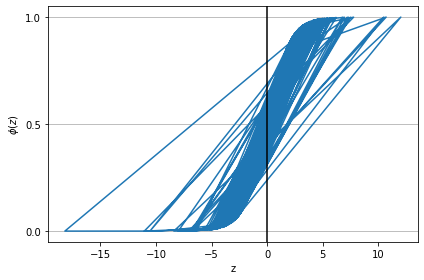

In [71]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
# Creating sample Z points
#
z=weekly['Lag1']

# Invoking Sigmoid function on all Z points
#
phi_z = sigmoid(z)

# Plotting the Sigmoid function
#
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.xlabel('z')
plt.ylabel('$\phi(z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

**C) Fit the Logistic Regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor.
Compute the confusion matrix and overall fraction of correct predictions for the held out data**

In [72]:
weekly_2008=pd.read_csv("weekly_2008.csv")
a=weekly_2008.drop(['Direction','Year'],axis=1).values
b=weekly_2008['Direction']
from sklearn.model_selection import train_test_split
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.20,random_state=1)
from sklearn.linear_model import LogisticRegression
logmodel_1=LogisticRegression()
logmodel_1.fit(a_train,b_train)
y_pred1=logmodel_1.predict(a_test)
from sklearn.metrics import confusion_matrix
c_m=confusion_matrix(b_test,y_pred1)
c_m

array([[  4,  76],
       [  4, 113]], dtype=int64)

**From this 1990 to 2008 years we get the confusion matrix.
our model is correctly predicted that market would go up on 113 days and that it go down on 4 days , for total 
4+113=117,correct predictions and 80 are incorrect prediction**

**D)Fitting LDA on Lag1 and Lag2**

**LDA**
- Linear Discriminant Analysis is classicfication machine learning algorithm. It works by calculating summary statistics for
the inpute features by class label, such as the mean and standard deviation. These statistics represent the model learned 
form the training data.
- LDA is also a dimensionality reduction technique.
- In LDA A confusion matrix, also known as an error matrix, is a summarized table used to asses the performance of a classification model. The number of correct and incorrect predictions are summarized with count values and broken down by each class.
- Accuracy : This is simply equal to the proportion of predictions that the model classfied correctly
- Accuracy=$\frac{#of correct predictions}{total # of predicions}$=**

In [73]:
def categorizing(dat):
    cat=dat.astype('category').cat.codes
    return cat
weekly['Direction']=categorizing(weekly['Direction'])

In [74]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
x_1 = weekly[['Lag1','Lag2']]
y_1 = weekly[['Direction']]
lda = LinearDiscriminantAnalysis()
lda.fit(x_1, y_1)

C:\Users\one\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LinearDiscriminantAnalysis()

In [75]:
x_1_train=weekly[['Lag1','Lag2']]
y_1_train=weekly[['Direction']]
x_1_test=weekly[['Lag1','Lag2']]
y_1_test=weekly[['Direction']]
LDA_model=lda.fit(x_1_train,y_1_train)
y_1_pred=lda.predict(x_1_test)
print(LDA_model.priors_)      #Prior Probabilities of group.

[0.44444444 0.55555556]


C:\Users\one\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


**LDA output indiacte that $\pi_1$=0.444444 and $\pi_2$=0.555555. In other words probability that 44.44$\%$ of the traning observation corrsponding to direction during which market went down. And probability 55.55$\%$ of the traning observation corrsponding to direction during which market went up**

**Group Means**

In [76]:
print(LDA_model.means_)

[[ 0.28229545 -0.04042355]
 [ 0.04521653  0.30428099]]


**The above are the group means,these are the average of each predictor within each class,and are used by LDA as estimate of
$\mu_k$.These suggest that there is tendency for the previous 2 days return to be positive when the market increases**

**Coefficient of Linear Discriminants**

In [77]:
print(LDA_model.coef_)

[[-0.03849002  0.05955142]]


**The coeffiecient of linear discriminants output provide the linear combination of Lag1 and Lag2 that are used to form the
Decision rule.**

**If -0.03849002$\times$ Lag1+0.05955142$\times$ Lag2 will large. The LDA classifier will predict a market increses and if it is small ,then LDA classifier will predict a market down.**

**Check confusion matrix to see how model is doing.**

In [78]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_1_test,y_1_pred)
print(matrix)

[[ 37 447]
 [ 37 568]]


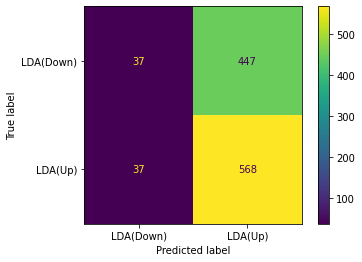

In [79]:
plot_confusion_matrix(lda,x_1_test,y_1_test,
                     
                     display_labels=["LDA(Down)","LDA(Up)"])

**The diagonal elemets are positively identified by the Direction. The market assigned 37 days to the "Down" class. and 
568 days to the "Up" class.**

**Mean Accuracy for LDA**

In [80]:
from sklearn.metrics import accuracy_score
Accuracy_score=accuracy_score(y_1_test,y_1_pred)
print(Accuracy_score)    # The model is 55 % Accurate give the result

0.5555555555555556


**E)Fitting QDA**

**QDA**
- Quadratic disriminant analysis is quite similar to Linear discriminant analysis except we relaxed the assumption that the mean 
covariance of all the classes were equal. Therefore, we required to calculate it separately.
- The difference is that QDA 
assumes that each class has its own covariance matrix, while LDA does not

In [81]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_1, y_1)
y2_pred=qda.predict(x_1_test)
model2=qda.fit(x_1_train,y_1_train)


C:\Users\one\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\one\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [82]:
print(model2.priors_)
print(model2.means_)

[0.44444444 0.55555556]
[[ 0.28229545 -0.04042355]
 [ 0.04521653  0.30428099]]


**The output contains the group means. But it does not contain te coefficients of the linear discriminants, because the QDA 
classifier involves a quadratic, rather than a linear, function of the predictors**

In [83]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_1_test,y2_pred)
print(matrix)

[[ 61 423]
 [ 63 542]]


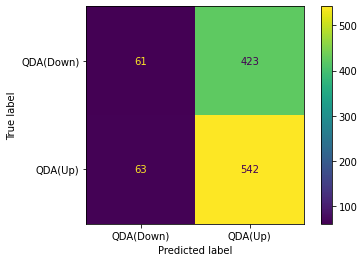

In [84]:
plot_confusion_matrix(qda,x_1_test,y_1_test,
                     
                     display_labels=["QDA(Down)","QDA(Up)"])


**Mean Accuracy for QDA**

In [85]:
from sklearn.metrics import accuracy_score
Accuracy_score=accuracy_score(y_1_test,y2_pred)
print(Accuracy_score)

0.5537190082644629


**The QDA predictions are accurate almost 55.37$\%$, LDA prediction are accurate almost 55.55$\%$ and logistic regression 
prediction score is 58.24$\%$. Then we say that the logistic regression gives more accuracy than LDA and QDA, the level of accuracy is quite impressive for weekly dataset**

**F)KNN fitting**

**KNN**
- K-nearest neighbors is one of the simplest supervised machine learning algorithm mostly used for classification 
- To find nearest neighbours we will calculate euclidean distance
- $dis(d)=\sqrt{(x-a)^2+(y-a)^2}$
- K-NN can be used to solve both classification and regression problem statments.
- It makes highly accurate predictions.
- If k=1, then the object is simply assigned to the class of that single nearest neighbour. K value indicate the count of 
the nearest neighbour.

In [86]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_1_train_1=sc.fit_transform(x_1_train)
x_1_test=sc.transform(x_1_test)
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_1_train,y_1_train)

C:\Users\one\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [87]:
y_pred_knn=knn.predict(x_1_test)
print(y_pred_knn)

[0 1 0 ... 0 0 0]


In [88]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_1_test,y_pred_knn)
print(matrix)

[[219 265]
 [262 343]]


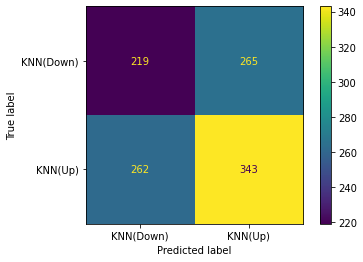

In [89]:
plot_confusion_matrix(knn,x_1_test,y_1_test,
                     
                     display_labels=["KNN(Down)","KNN(Up)"])

**The result using k=1 are not very good.The diagonal elements are positively identified by class and tells us that the market
goes on down by 219 days and the market increses by 343 days.**

**Mean Accuracy for KNN**

In [90]:
from sklearn.metrics import accuracy_score
Accuracy_score=accuracy_score(y_1_test,y_pred_knn)
print("Accuracy of the model is",Accuracy_score)
print("Error rate of model is",(1-Accuracy_score))

Accuracy of the model is 0.5160697887970616
Error rate of model is 0.48393021120293844


**We got Accuracy of the model is $51\%$.
As we have increased the number of neighbors in the model.the accuracy got decreases but this is not necessray for each case.**

**For k=2**

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier(n_neighbors=2)
knn1.fit(x_1_train,y_1_train)
y_pred_knn1=knn1.predict(x_1_test)
from sklearn.metrics import accuracy_score
Accuracy_score=accuracy_score(y_1_test,y_pred_knn1)
print(Accuracy_score)

0.4921946740128558


C:\Users\one\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


**On Applying Logistic,QDA,LDA and Knn on the model. We get best result by Logistic regression model.**